# Abedin Sherifi
# Deep Reinforcement Learning (DRL)

DRL uses Deep Neural Networks to come up with best actions for the agent. <br>

The Markov Decision Process (MDP) is a mathematical formulation of the RL problem. The Markov Property states that the current state is fully representative of the state of the environment. Hence, the future is only dependent on the present. <br>

S - State Space <br>
A - Action Space <br> 
R - Rewards for each pair of (S,A) <br>
P - Transition Probability <br>
Gamma - reward discount factor <br>

Gamma is between 0 and 1. A value of 1 for gamma means that immediate rewards are valued highest. A value of closer to 0 means that future rewards are valued highest. <br>

The objective of RL is to find an optimal policy that maximizes the cumulative discounted reward. A policy here is nothing else than a mapping of states to actions. <br>

Q-Learning is an off-policy algorithm for temporal difference (TD) learning which implies model free learning.

Q-Learning: <br>
    $$Q_{t+1}(s_t, a_t) = Q_{t}(s_t, a_t) + \alpha(r_{t+1} + \gamma max Q_{t}(s_{t+1},a) - Q_{t}(s_t, a_t)$$

Learning rate $\alpha$ specifies the learning rate for the agent of accepting new information over learnt information. <br>

Q-Learning Algorithm Steps:
- Initialize Q-Table with (s,a) all zeros per shape with size of states and actions
- Observe initial state s
- Perform action a
- Observe reward r and a new state $s_{t+1}$
- Update Q-Table with r and maximum reward from $s_{t+1}$

RL algorithms are based on exploration/exploitation concepts. <br>
Exploration is the finding of new information about the environment. <br>
Exploitation is the use of existing information to maximize the reward. <br>

## Imports

In [1]:
import numpy as np          #Numpy is for our Qtable
import gym                  #OpenAI gym is for our environment, i.e., our Taxi Environment
import random               #Random is for generating random numbers

## Load the game environment and render what it looks like

In [2]:
env = gym.make("Taxi-v3")
env.reset()                  #Resets the environment and returns a random initial state.
env.render()                 #Renders one frame of the environment (helpful in visualizing the environment)

/home/dino/.local/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/dino/.local/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/dino/.local/lib/python3.8/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mod

In [3]:
print("Number of actions: %d" % env.action_space.n)
print("Number of states: %d" % env.observation_space.n)

Number of actions: 6
Number of states: 500


In [4]:
state = env.observation_space.sample() # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 410


/home/dino/.local/lib/python3.8/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [7]:
env.P[328]

# {action: [(probability, nextstate, reward, done)]}

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

## Randomly Choosing Actions

Timesteps taken: 200
Total Penalties: 7135
Total Rewards: -839
Average rewards per epoch: -0.04174129353233831
Average penalties per epoch: 0.35497512437810946


/home/dino/.local/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


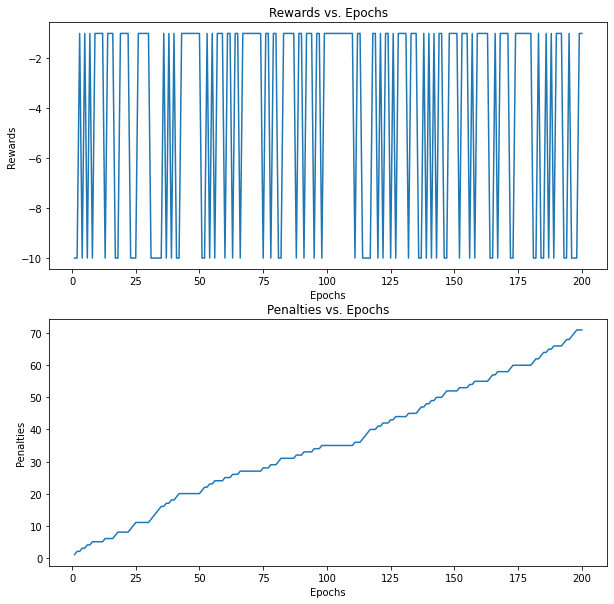

In [5]:
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

env.observation_space.sample()  # set environment to illustration's state

epochs = 0
penalties, reward, total_penalties = 0, 0, 0
total_rewards, total_epochs = 0, 0
frames = [] # for animation

rewards_plot = []
penalties_plot = []
epochs_plot = []

done = False

while not done:
    #env.render()
    action = env.action_space.sample()

    new_state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    total_rewards += reward
    epochs += 1
    total_penalties += penalties
    total_epochs += epochs
    frames.append({'frames': env.render(mode='ansi'), 'state': state, 'action': action, 'reward': reward})
    #env.render()
    
    rewards_plot.append(reward)
    penalties_plot.append(penalties)
    epochs_plot.append(epochs)
    
    
print("Timesteps taken: {}".format(epochs))
print("Total Penalties: {}".format(total_penalties))
print("Total Rewards: {}".format(total_rewards))
print(f"Average rewards per epoch: {total_rewards / total_epochs}")
print(f"Average penalties per epoch: {total_penalties / total_epochs}")

# Plot learning graph
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].plot(epochs_plot, rewards_plot)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Rewards');
ax[0].set_title('Rewards vs. Epochs');
ax[1].plot(epochs_plot, penalties_plot)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Penalties');
ax[1].set_title('Penalties vs. Epochs');

In [6]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frames'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 200
State: 410
Action: 2
Reward: -1


## Q-Learning

In [7]:
q_table = np.zeros([env.observation_space.n, env.action_space.n]) #Initializing our Qtable as a null matrix
print(q_table)
print(q_table.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(500, 6)


In [8]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

#env.s = 328  # set environment to illustration's state

for i in range(1, 50001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 50000
Training finished.

CPU times: user 35 s, sys: 6.65 s, total: 41.6 s
Wall time: 34.6 s


In [9]:
q_table[400]

array([0., 0., 0., 0., 0., 0.])

Timesteps taken: 10
Total Penalties: 0
Total Rewards: 11
Average rewards per epoch: 0.0008420730306973895
Average penalties per epoch: 0.0
Results after 1000 episodes:
Average timesteps per episode: 13.063
Average penalties per episode: 0.0


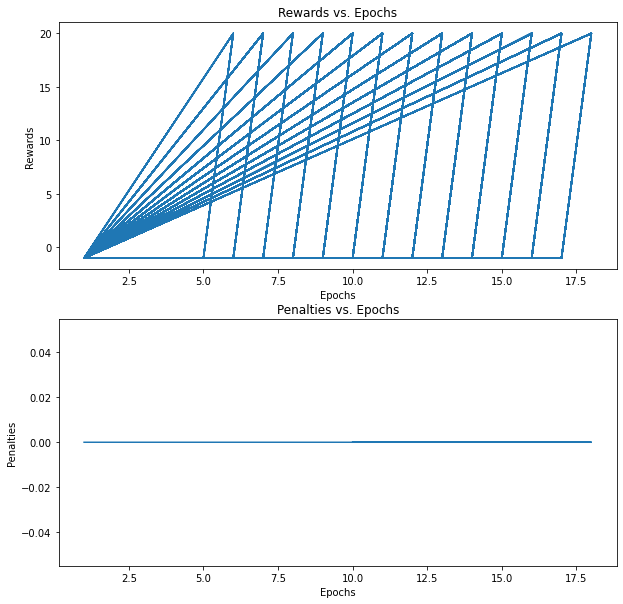

In [10]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 1000
rewards_list = []

rewards_plot = []
penalties_plot = []
epochs_plot = []

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    total_rewards = 0 
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_rewards += reward
        
        if reward == -10:
            penalties += 1

        epochs += 1
        #env.render()
        
        rewards_plot.append(reward)
        penalties_plot.append(penalties)
        epochs_plot.append(epochs)
        
    total_penalties += penalties
    total_epochs += epochs
    rewards_list.append(total_rewards)
    
print("Timesteps taken: {}".format(epochs))
print("Total Penalties: {}".format(total_penalties))
print("Total Rewards: {}".format(total_rewards))
print(f"Average rewards per epoch: {total_rewards / total_epochs}")
print(f"Average penalties per epoch: {total_penalties / total_epochs}")
    
# Plot learning graph
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].plot(epochs_plot, rewards_plot)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Rewards');
ax[0].set_title('Rewards vs. Epochs');
ax[1].plot(epochs_plot, penalties_plot)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Penalties');
ax[1].set_title('Penalties vs. Epochs');
    
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

/usr/lib/python3/dist-packages/ipywidgets/widgets/widget_selection.py:9: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/lib/python3/dist-packages/ipywidgets/widgets/interaction.py:29: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable, Mapping
/usr/lib/python3/dist-packages/ipywidgets/widgets/widget_link.py:19: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`) Passing types is deprecated in traitlets 4.1.
  super(WidgetTraitTuple, self).__init__(Instance(Widget), Unicode, **kwargs)


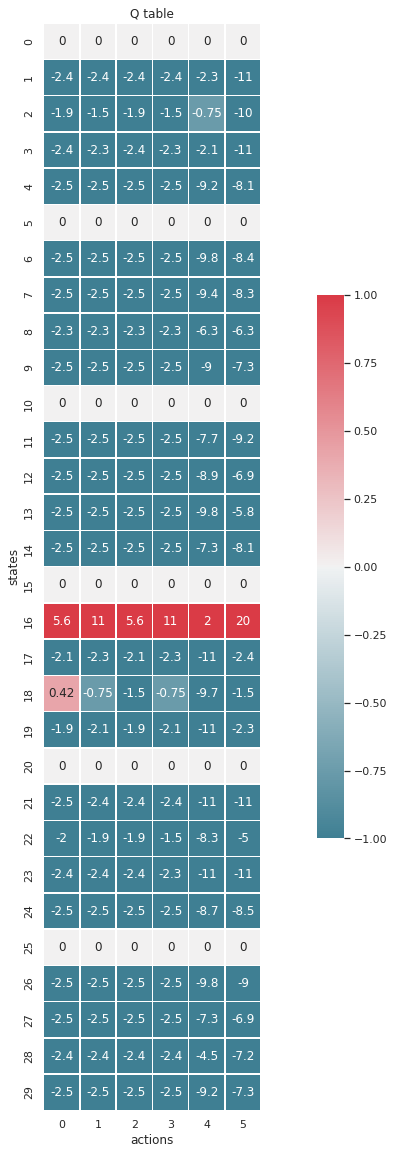

In [11]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    q_table[:30], 
    cmap=cmap, 
    vmax=1.0, 
    vmin=-1.0, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5},
    annot = True
)

plt.title('Q table')
plt.xlabel('actions')
plt.ylabel('states');



## Deep Q-Learning (DQN)

DQN combines Q-Learning with a convolutional neural network to find the optimal Q-value function. DQN uses states as input and optimal Q-value of all possible actions as the output. <br>

In this instance of DQN, we are using a CNN. An image from the taxi game is fed to the CNN and it will output Q value of all of the actions in the state. <br>
<br>
CNN layers extract features from the image and produce a feature map. The flatten layer will flatten the feature map and feed it as an input to the feedforward network. The feedforward network takes this flattened feature map as an input and returns the Q value of all the actions in the state such as $Q(s,a_0),\, Q(s,a_1),\, Q(s,a_2) \, etc$. <br>



## Imports

In [1]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
class DQN_Agent:
    #
    # Initializes attributes and constructs CNN model and target_model
    #
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=5000)
        
        # Hyperparameters
        self.gamma = 1.0            # Discount rate
        self.epsilon = 1.0          # Exploration rate
        self.epsilon_min = 0.1      # Minimal exploration rate (epsilon-greedy)
        self.epsilon_decay = 0.995  # Decay rate for epsilon
        self.update_rate = 1000     # Number of steps until updating the target network
        
        # Construct DQN models
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.model.summary()

    #
    # Constructs CNN
    #
    def _build_model(self):
        model = Sequential()
        
        # Conv Layers
        model.add(Conv2D(32, (8, 8), strides=4, padding='same', input_shape=self.state_size))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (4, 4), strides=2, padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(Flatten())

        # FC Layers
        model.add(Dense(512, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=Adam())
        return model

    #
    # Stores experience in replay memory
    #
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    #
    # Chooses action based on epsilon-greedy policy
    #
    def act(self, state):
        # Random exploration
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        
        return np.argmax(act_values[0])  # Returns action using policy

    #
    # Trains the model using randomly selected experiences in the replay memory
    #
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            
            if not done:
                target = (reward + self.gamma * np.amax(self.target_model.predict(next_state)))
            else:
                target = reward
                
            # Construct the target vector as follows:
            # 1. Use the current model to output the Q-value predictions
            target_f = self.model.predict(state)
            
            # 2. Rewrite the chosen action value with the computed target
            target_f[0][action] = target
            
            # 3. Use vectors in the objective computation
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    #
    # Sets the target model parameters to the current model parameters
    #
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
            
    #
    # Loads a saved model
    #
    def load(self, name):
        self.model.load_weights(name)

    #
    # Saves parameters of a trained model
    #
    def save(self, name):
        self.model.save_weights(name)

In [3]:
# Helpful preprocessing taken from github.com/ageron/tiny-dqn
def process_frame(frame):
    mspacman_color = np.array([210, 164, 74]).mean()
    img = frame[1:176:2, ::2]    # Crop and downsize
    img = img.mean(axis=2)       # Convert to greyscale
    img[img==mspacman_color] = 0 # Improve contrast by making pacman white
    img = (img - 128) / 128 - 1  # Normalize from -1 to 1.
    
    return np.expand_dims(img.reshape(242, 100, 1), axis=0)

In [4]:
def blend_images(images, blend):
    avg_image = np.expand_dims(np.zeros((242, 100, 1), np.float64), axis=0)

    for image in images:
        avg_image += image
        
    if len(images) < blend:
        return avg_image / len(images)
    else:
        return avg_image / blend

In [5]:
env = gym.make("Taxi-v3")
state_size = (242, 100, 1)
action_size = env.action_space.n
agent = DQN_Agent(state_size, action_size)

episodes = 10000
batch_size = 32
skip_start = 90
total_time = 0   # Counter for total number of steps taken
all_rewards = 0  # Used to compute avg reward over time
blend = 4        # Number of images to blend
done = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 25, 32)        2080      
_________________________________________________________________
activation (Activation)      (None, 61, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 13, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 31, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 13, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 31, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25792)             0

/home/dino/.local/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/dino/.local/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
for e in range(episodes):
    total_reward = 0
    game_score = 0
    initial_state = env.reset()
    current_image = env.render(mode = 'rgb_array')
    state = process_frame(current_image)
    images = deque(maxlen=blend)  # Array of images to be blended
    images.append(state)
    
    for skip in range(skip_start): # skip the start of each game
        env.step(0)
    
    for time in range(20000):
        #env.render()
        total_time += 1
        
        # Every update_rate timesteps we update the target network parameters
        if total_time % agent.update_rate == 0:
            agent.update_target_model()
        
        # Return the avg of the last 4 frames
        state = blend_images(images, blend)
        
        # Transition Dynamics
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        
        # Return the avg of the last 4 frames
        next_state = env.render(mode='rgb_array')
        next_state = process_frame(next_state)
        images.append(next_state)
        next_state = blend_images(images, blend)
        
        # Store sequence in replay memory
        agent.remember(state, action, reward, next_state, done)
        
        state = next_state
        game_score += reward
        reward -= 1  # Punish behavior which does not accumulate reward
        total_reward += reward
        
        if done:
            all_rewards += game_score
            
            print("episode: {}/{}, game score: {}, reward: {}, avg reward: {}, time: {}, total time: {}"
                  .format(e+1, episodes, game_score, total_reward, all_rewards/(e+1), time, total_time))
            
            break
            
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

/home/dino/.local/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


KeyboardInterrupt: 